In [4]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
telco_base_data = pd.read_csv('Data/Churn_Modelling.csv')

In [6]:
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
telco_new = telco_base_data[['Geography', 'Gender', 'Exited']] 

In [8]:
telco_new

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0
...,...,...,...
9995,France,Male,0
9996,France,Male,0
9997,France,Female,1
9998,Germany,Male,1


In [9]:
telco_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Geography  10000 non-null  object
 1   Gender     10000 non-null  object
 2   Exited     10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [10]:
telco_new['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
telco_new['Exited'].value_counts()/len(telco_new) * 100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

###### We got active customer 79.63% and churn customer 20.37%

# Univariate Analysis

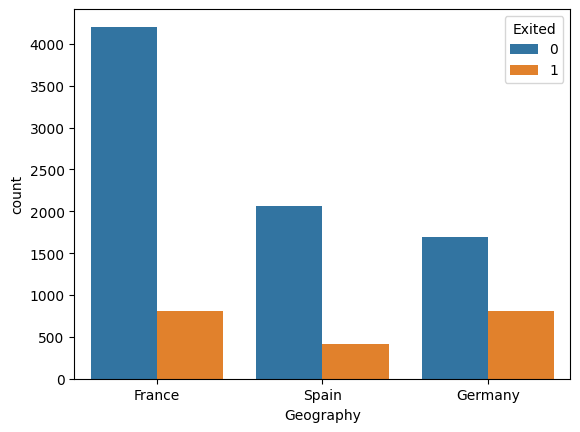

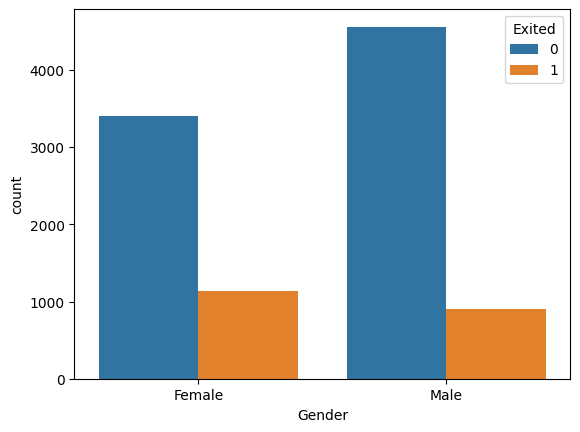

In [13]:
for i, predictor in enumerate(telco_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=telco_new, x=predictor, hue='Exited')

# Bivariate Analysis

<AxesSubplot: xlabel='Gender', ylabel='Count'>

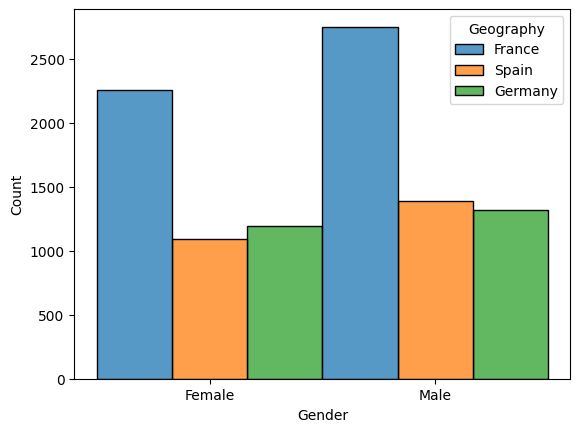

In [14]:
sns.histplot(x='Gender', hue='Geography', data=telco_new, stat='count', multiple='dodge')

In [15]:
telco_new_target1 = telco_new.loc[telco_new['Exited']==1]

<AxesSubplot: xlabel='Gender', ylabel='Count'>

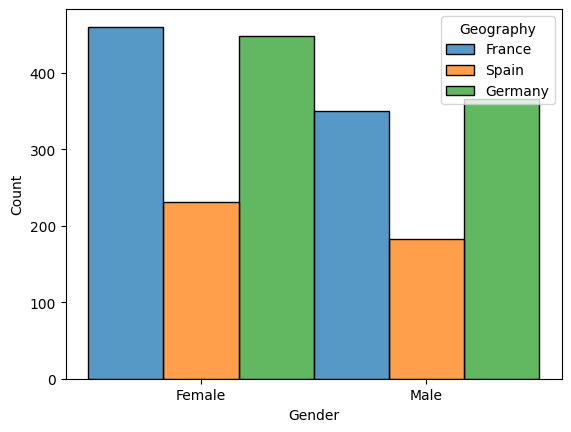

In [16]:
sns.histplot(data=telco_new_target1, x='Gender', hue='Geography', stat='count', multiple='dodge')

# Numerical Analysis

In [17]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
telco_numerical_data = telco_base_data.drop(["Surname", 'Geography', 'Gender'], axis=1)

In [20]:
telco_numerical_data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [24]:
telco_numerical_data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot: >

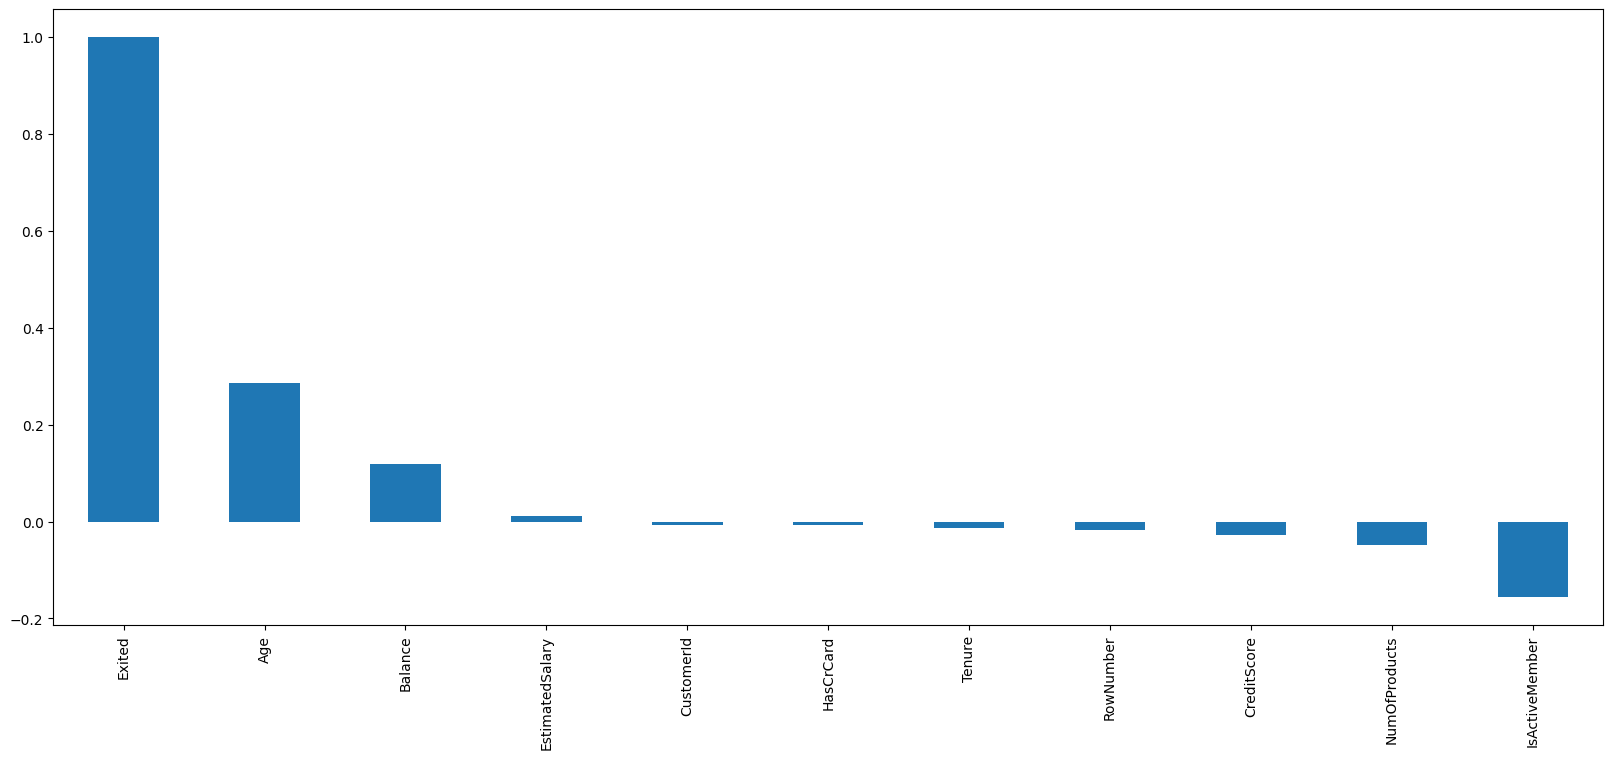

In [28]:
plt.figure(figsize=(20, 8))
telco_numerical_data.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot: >

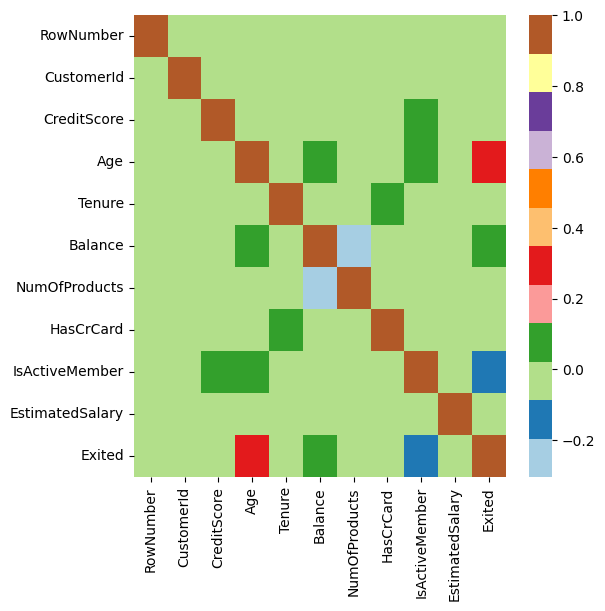

In [27]:
plt.figure(figsize=(6,6))
sns.heatmap(telco_numerical_data.corr(), cmap='Paired')

<AxesSubplot: xlabel='Age'>

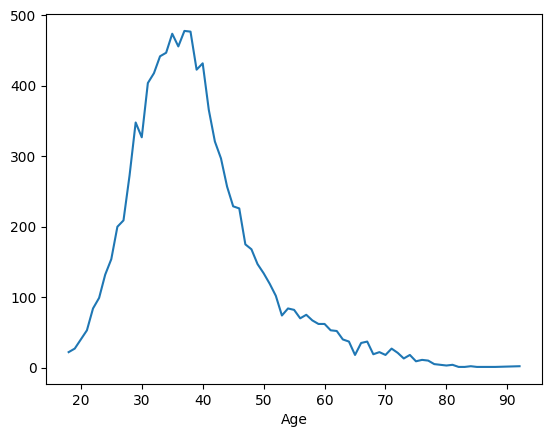

In [31]:
telco_numerical_data['Age'].value_counts().sort_index(ascending=True).plot()

<AxesSubplot: xlabel='Age'>

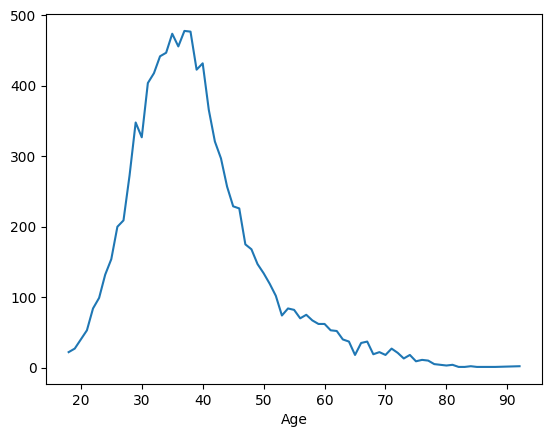

In [37]:
# Line plot with age in original dataframe
telco_base_data['Age'].value_counts().sort_index().plot()

In [41]:
# Line plot with age in Churn data frame
telco_base_data_1 = telco_base_data.loc[telco_base_data["Exited"]==1]
telco_base_data_1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


<AxesSubplot: xlabel='Age'>

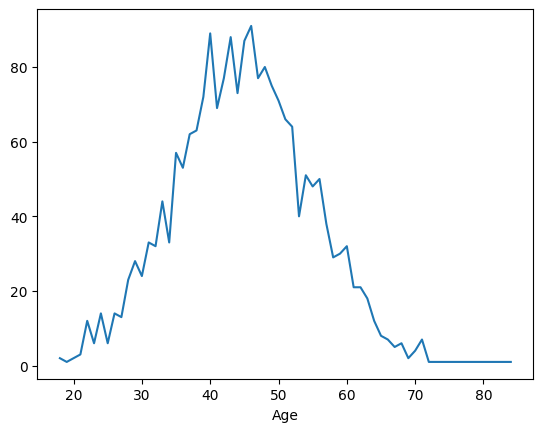

In [44]:
# Line plot with age in Churn data frame
telco_base_data_1['Age'].value_counts().sort_index(ascending=True).plot()

Text(0.5, 1.0, 'Age by churn')

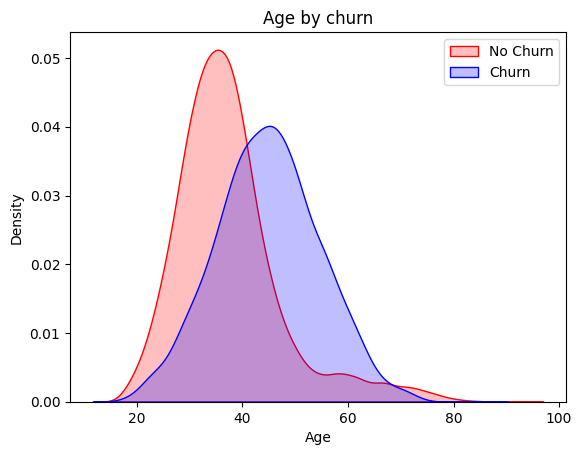

In [49]:
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==0)],
                  color="Red", fill=True)
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==1)],
                  color="Blue", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')

Text(0.5, 1.0, 'Age by churn')

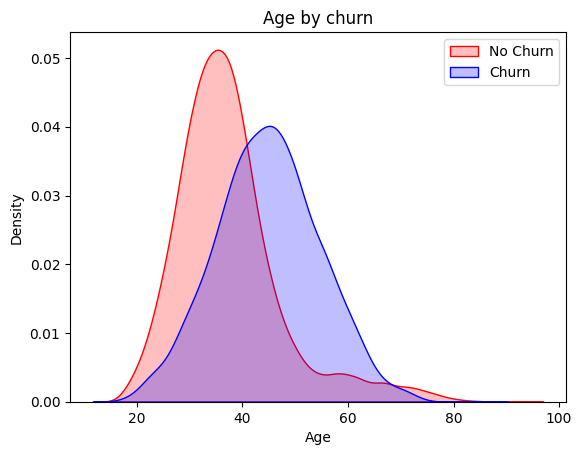

In [50]:
Tot = sns.kdeplot(telco_base_data['Age'][(telco_base_data["Exited"]==0)],
                  color="Red", fill=True)
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==1)],
                  color="Blue", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')

Text(0.5, 1.0, 'Balance by churn')

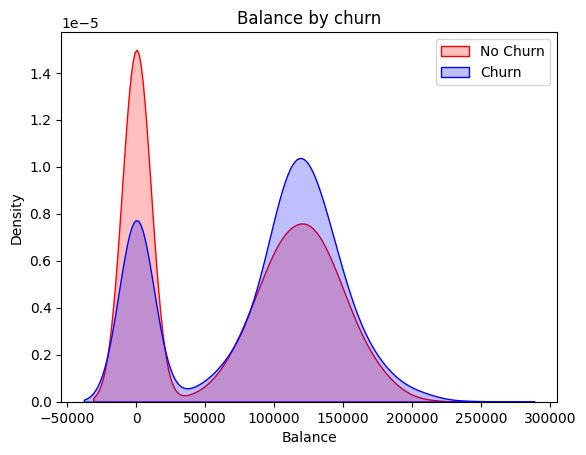

In [53]:
Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==0)],
                  color="Red", fill=True)
Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==1)],
                  color="Blue", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Balance by churn')